# Assignment 1
## Hacettepe University Computer Science & Engineering Department
### Course : BBM 409
### Name : Utku İPEK
### Student ID : 21627356
### Instructor : Aykut ERDEM
### TA : Burçak ASAL

## Part I: Theory Questions
### k-Nearest Neighbor Classification
#### 1.Assume that you have a large training dataset. Specify a disadvantage of the k- Nearest Neighbor method when using it during testing. State also your reason about your answer.
Since k-NN is a instance based learning algorithm, it stores all the training data and that might require high amount of memory. So that prediction stage might be slow.

#### 2.Create a 1-Dimensional classification dataset in which the 1-Nearest Neighbors method always gives a leave-one out cross validation error value of 1 (In other words, the method can’t guess correct class for a specific point in the dataset ). State also a proper explanation about your reasoning.


#### 3. Assume that you have the following training set of positive (+), negative (-) in- stances and a single test instance (o) in the figure below (Figure 1). Assume also that the Euclidean metric is used for measuring the distance between instances. Finally consider that every nearest neighbor instance affects the final vote equally.
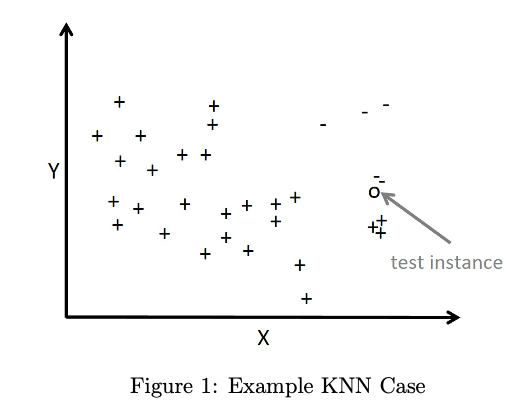
#### • What is the class appointed to the test instance for K=1? State also reason behind your answer.
#### • What is the class appointed to the test instance for K=3? State also reason behind your answer.
#### • What is the class appointed to the test instance for K=5? State also reason behind your answer.

For k = 1 Class appointed: '-'. Because it's nearest neighbor according to Euclidean metric is '-'.
For k = 3 Class appointed: '-'. Because it's both nearest neighbor according to Euclidean metric is '-'.
For k = 5 Class appointed: '+'. Because it's 2 neearest neighbors is '-' but remaining 3 is '+'. Since it is not weighted k-NN, the answer is '+'.

#### 4.Fill the blanks with T (True) or F (False) for the statements below:
#### • If all instances of the data have the same scale then k-Nearest Neighbor’s performance increases drastically. (T)
#### • If all instances of the data have the same scale then k-Nearest Neighbor’s performance increases drastically. (T)
#### • If all instances of the data have the same scale then k-Nearest Neighbor’s performance increases drastically. (T)

### Linear Regression



#### 1. Assume that you have five students have registered to a class and the class have a midterm and the final exam. You have obtained a set of their marks on two exams, which is in the table below:
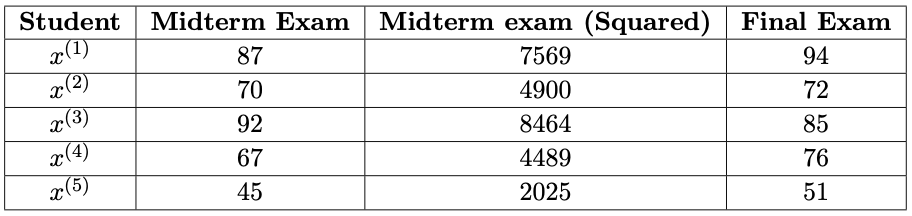
#### You plan to a model which form’s is fθ(x) = θ0 + θ1x1 + θ2x2 for fitting the dataabove. The x1 shows midterm exam score while x2 shows square of the midterm score. Besides you plan to use feature scaling (using divide operation by the ”max-min”, or range, of a feature) and mean normalization. What is the normalized value of the feature x2(4)? 
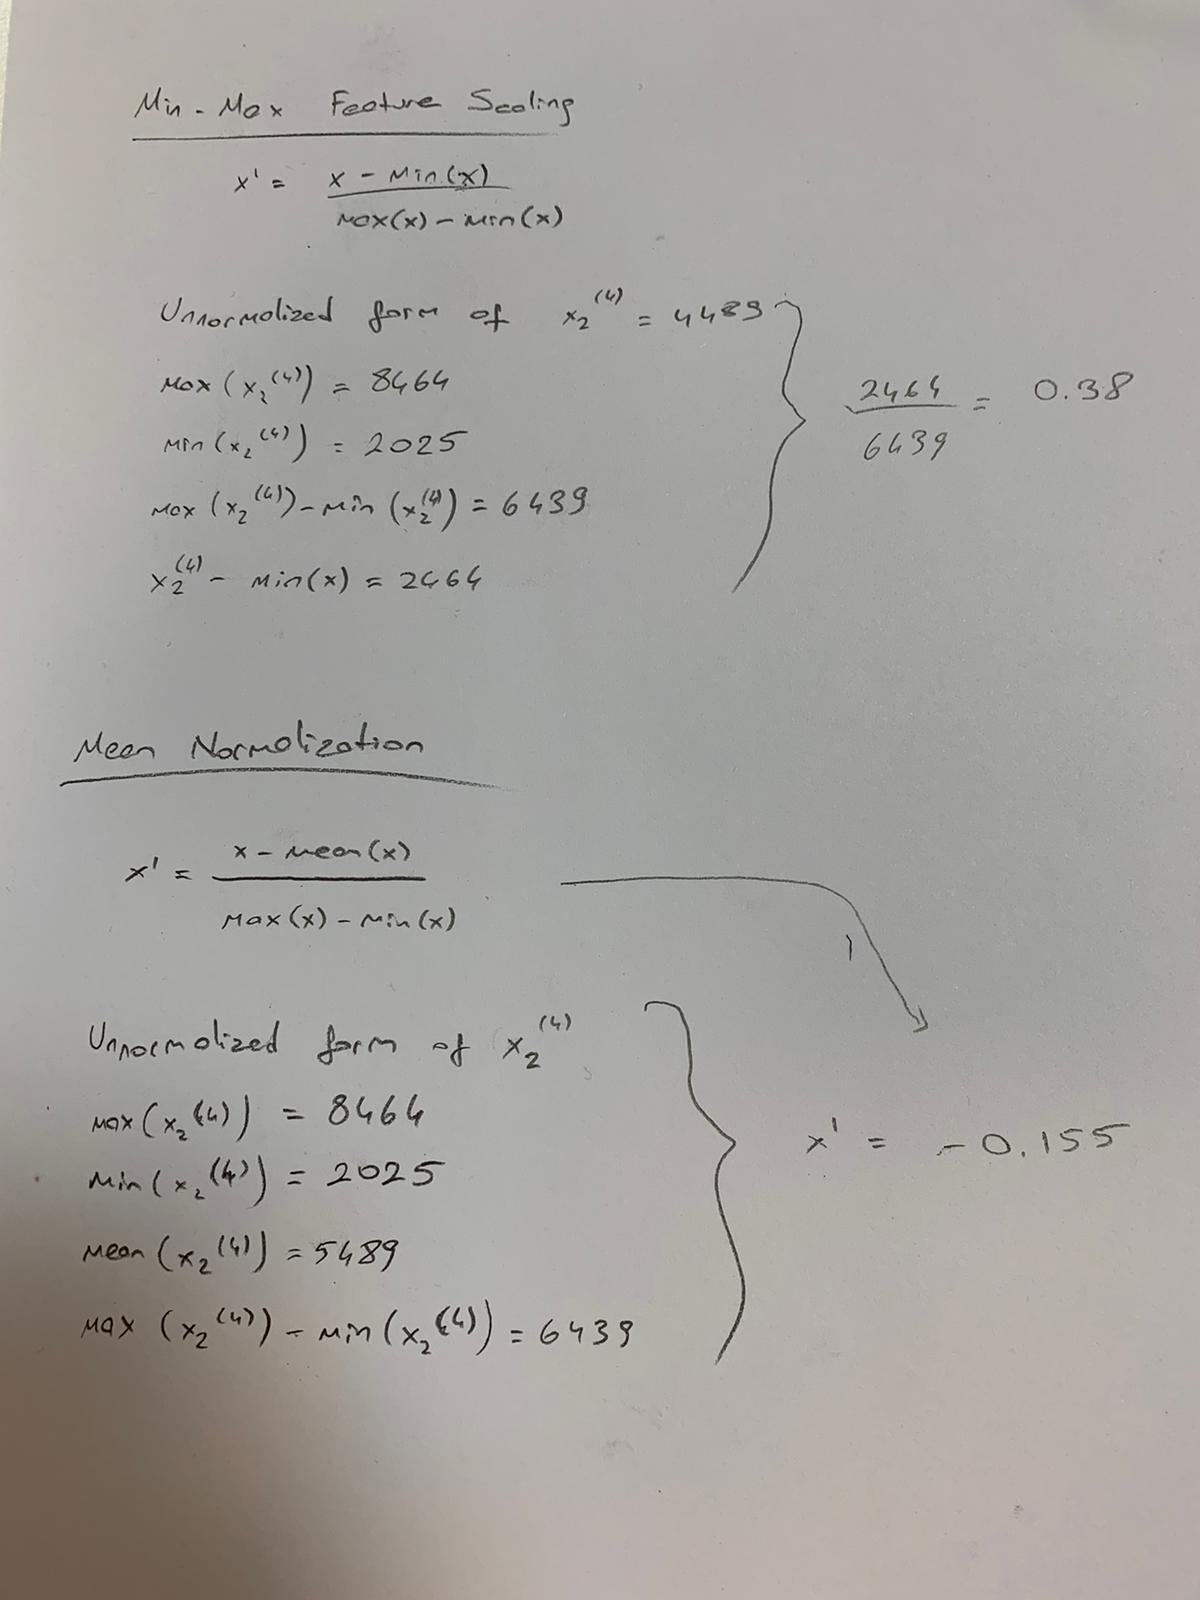

#### 2. Considering the figure below (Figure 2), which of the offsets used in linear regres- sions least square line fit? Assume that horizontal axis represents independent variable and vertical axis represents dependent variable. State your answer with your proper explanation. 
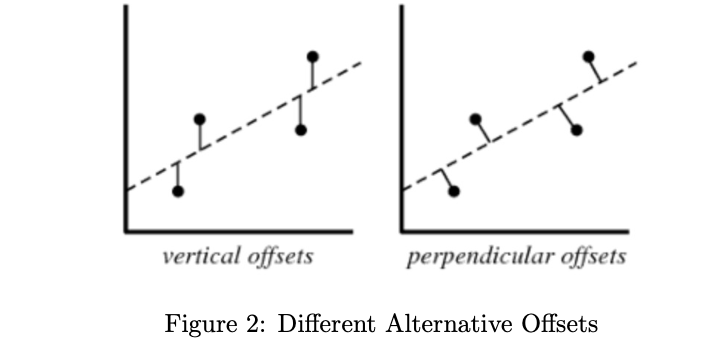



#### 3.Considering the table below (Table 1), consisting of four training examples:
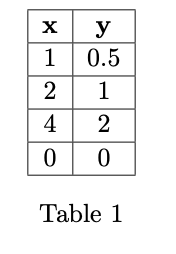
#### Assume that you are trying to fit the data above to the linear regression model fθ(x) = θ0 + θ1x1. Find the θ0 and θ1 values by using closed form solution (θ = (XT X)−1XT y). Also state dimension values of X, y and θ matrices. Finally show your calculations step by step.
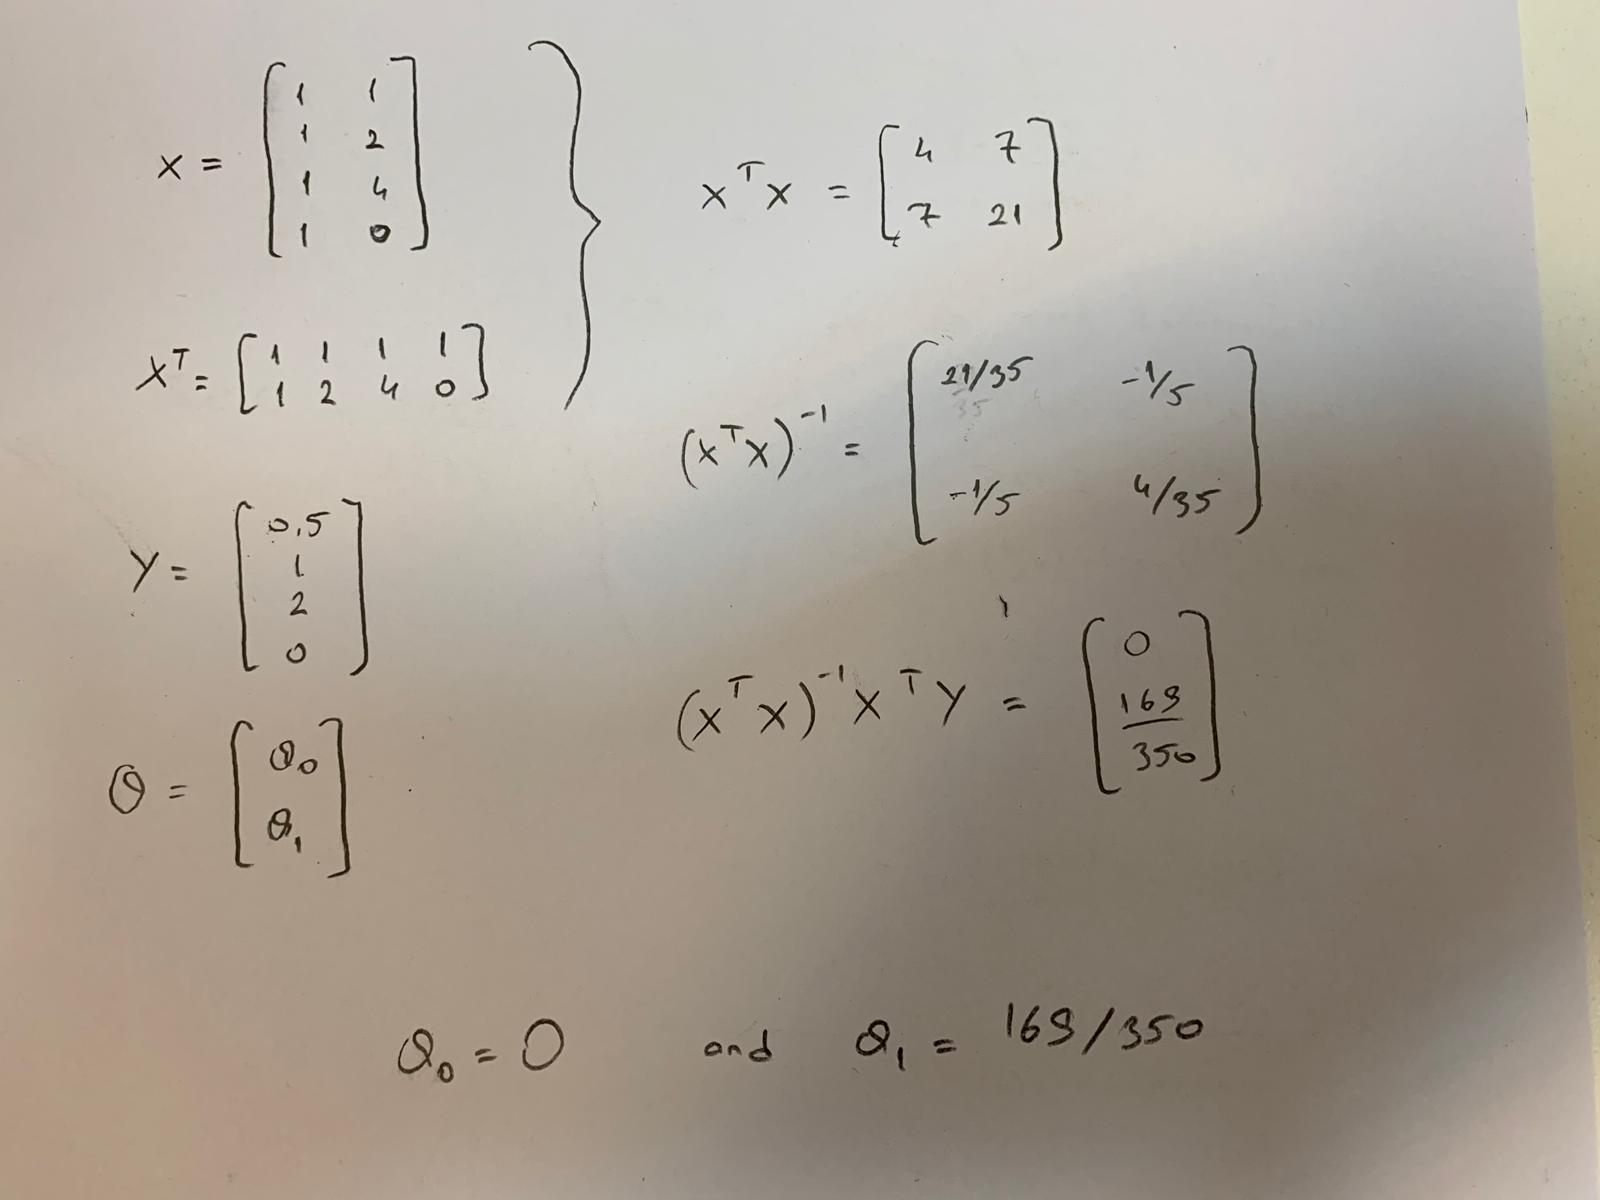

#### 4. State a valid reason for feature scaling and explain why it is a valid reason with respect to your reasoning.
With feature scaling, we make sure different features on a similar scale. If we don't apply feature scaling when necessary, it takes a long time for gradient descent algorithm to find global minimum value on the cost function's contour graph. 

## Part II: Movie Reccomendation System
### Problem 
In this assignment, we are asked to implement a movie recommendation system using k-Nearest Neighbors and weighted k-Nearest Neighbors algorithm. To implement that system, we are again asked to used user-based collaborative filtering system. We are given four datasets, and the main goal is that our program predicts the given user's rating of a given movie based on the user's k nearest neighbors and optionally it can recommend a movie list to a user again based on k nearest neighbors.


### Datasets and Libraries
First, I have imported the necessary libraries. Pandas for reading and editing data, numpy for matrix operations, math for some math operations, time for calculating the time the program takes and finally matplotlib to visualise change rate of error rates due to k value.
After that, I have read the "movies.csv" and "ratings_train.csv" files and combine them using pandas library. I have not used tags and links file, the program's train data is only contains values from ratings_train.csv" file.
  

In [1]:
import pandas as pd 
import numpy as np
import math
import time
import matplotlib.pyplot as plt

In [2]:
#reading csv files using pandas library
movies = pd.read_csv("movies.csv", encoding="Latin1")
ratings = pd.read_csv("ratings_train.csv", encoding="Latin1")
#combine data
combined_ratings = pd.merge(ratings, movies, on='movieId')
combined_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,18,1,3.5,1455209816,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


### Normalize Rating Values
Below, I have tried to normalize user rating values. Because, since not every user's rate scale is same each other, some prediction problems can occur and these problems may reduce the efficiency of the algorithm.
To normalize rating values, firstly, I have calculated each user's average rating value, then found the difference between the rating value and average rating value. (Note that 'rating_y' is the average rating of the user, 'rating_avg' is the normalized rating value.)

In [3]:
#find average rating of users
average_rating = pd.DataFrame(combined_ratings.groupby('userId')['rating'].mean())

#normalize rating values
final_ratings = pd.merge(combined_ratings, average_rating, on='userId')
final_ratings['rating_avg'] = final_ratings['rating_x'] - final_ratings['rating_y']
final_ratings.head()

,userId,movieId,rating_x,timestamp,title,genres,rating_y,rating_avg
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.366379,-0.366379
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,4.366379,-0.366379
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,4.366379,-0.366379
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,4.366379,0.633621
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.366379,0.633621


### Train-Test Data Seperation 
I have tried to implement k-fold cross validation algorithm but I have failed. My program doesn't use k-fold cross validation. For validation, first, I have shuffled the data then split it.

In [4]:
#split data 
final_ratings = final_ratings.sample(frac=1)
msk = np.random.rand(len(final_ratings)) < 0.9
rating_train = final_ratings[msk]
rating_test = final_ratings[~msk]

Below, again for the efficiency of the algorithm, I have excluded some values from the training set. My limit for a user is that a user should have rated at least 15 movies and for a movie is that a movie should have been rated at least 5 times so that when finding cosine similarity values from user-movie vectors, the values make sense.

In [5]:
#exclude some movies and users from training set
count = rating_train['userId'].value_counts()
rating_train = rating_train[rating_train['userId'].isin(count[count >= 15].index)]
count_1 = rating_train['movieId'].value_counts()
rating_train = rating_train[rating_train['movieId'].isin(count_1[count_1 >= 5].index)]
rating_train.head()

,userId,movieId,rating_x,timestamp,title,genres,rating_y,rating_avg
23339,414,379,2.0,961515325,Timecop (1994),Action|Sci-Fi|Thriller,3.391957,-1.391957
54238,284,231,4.0,832695208,Dumb & Dumber (Dumb and Dumber) (1994),Adventure|Comedy,3.715909,0.284091
38012,597,1395,4.0,940362008,Tin Men (1987),Comedy|Drama,3.977427,0.022573
37120,587,236,5.0,953139541,French Kiss (1995),Action|Comedy|Romance,3.975758,1.024242
14113,266,785,4.0,944940668,Kingpin (1996),Comedy,3.500000,0.500000


After excluding the values from training set, I have created the userId-MovieId pivot table which is necessary to implement a collaborative-filtering system.

In [6]:
#creating pivot table with normalized rating values
pivot = pd.pivot_table(rating_train, values='rating_avg', index='userId', columns='movieId')
pivot.head()

movieId,1,2,3,5,6,7,9,10,11,12,...,171763,174055,175303,176101,176371,177593,177765,179819,180031,187593
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.366379,NaN,-0.366379,NaN,-0.366379,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.363636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,0.506369,1.506369,1.506369,0.506369,0.506369,NaN,NaN,0.506369,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As seen above, there are too many 'nan' values in the pivot table since not every user rated every movie in the training set. From there, there are some approaches like fill the 'nan' values with zeros, or fill the 'nan' values with user's rating average. Firstly I have decided to fill the 'nan' values with zeros but then I have realized that some users' normalized rating values are already zero. And because of that while I was trying to create similarity matrix, since some vectors have all zero values, my cosine similarity function produces warnings because of zero division. Then I have decided to fill the 'nan' values with movie average.

In [7]:
#fill nan's with appropriate values
final_pivot = pivot.fillna(pivot.mean(axis=0))
final_pivot.head()

movieId,1,2,3,5,6,7,9,10,11,12,...,171763,174055,175303,176101,176371,177593,177765,179819,180031,187593
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.366379,-0.036708,-0.366379,-0.499152,-0.366379,-0.387433,-0.528285,-0.09539,0.096453,-1.06375,...,0.783574,0.325015,-0.14615,-0.405721,0.323041,0.966466,-0.060698,-0.13184,0.279824,0.240034
2,0.329982,-0.036708,-0.292146,-0.499152,0.410953,-0.387433,-0.528285,-0.09539,0.096453,-1.06375,...,0.783574,0.325015,-0.14615,-0.405721,0.323041,0.966466,-0.060698,-0.13184,0.279824,0.240034
3,0.329982,-0.036708,-0.292146,-0.499152,0.410953,-0.387433,-0.528285,-0.09539,0.096453,-1.06375,...,0.783574,0.325015,-0.14615,-0.405721,0.323041,0.966466,-0.060698,-0.13184,0.279824,0.240034
5,0.363636,-0.036708,-0.292146,-0.499152,0.410953,-0.387433,-0.528285,-0.09539,0.096453,-1.06375,...,0.783574,0.325015,-0.14615,-0.405721,0.323041,0.966466,-0.060698,-0.13184,0.279824,0.240034
6,0.329982,0.506369,1.506369,1.506369,0.506369,0.506369,-0.528285,-0.09539,0.506369,-1.06375,...,0.783574,0.325015,-0.14615,-0.405721,0.323041,0.966466,-0.060698,-0.13184,0.279824,0.240034


### Functions For Similarity Operations


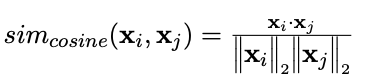
I have chosen the above similarity function. It's implementation is below. Among other two functions, while the one that is named create_vectors is takes the pivot table as a parameter and create movie rating vectors using dictionary data structure for every user and returns it, apply_similarity function creates a user-user similarity_matrix and fills the value with the similarity of the vectors that is created by the create_vectors function.

In [8]:
#cosine similarity function
def cosine_sim(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm_v1 = np.linalg.norm(vector1)
    norm_v2 = np.linalg.norm(vector2)
    similarity_value = dot_product / (norm_v1 * norm_v2)
    return similarity_value


In [9]:
#create vectors to apply similarity function using dictionary
def create_vectors(training_data):
    Dict = {}
    for i in range(len(training_data.index)):
        Dict[training_data.index[i]] = training_data.iloc[i, :].values
    return Dict


In [10]:
#applying cosine similarity function to users
def apply_similarity(user_vector, training_data):
    cosine = pd.DataFrame(index=training_data.index, columns=training_data.index)
    for key_1 in user_vector.keys():
        for key_2 in user_vector.keys():
            if math.isnan(cosine[key_1][key_2]):
                if(key_1 == key_2):
                    cosine[key_1][key_2] = 0
                else:
                    sim_value = cosine_sim(user_vector[key_1], user_vector[key_2])
                    cosine[key_1][key_2] = sim_value
                    cosine[key_2][key_1] = sim_value
    return cosine

### k-NN and Weighted k-NN

Below, to find nearest neighbors of the given user, I have implemented find_nearest_neighbors function which takes five parameters and returns k nearest neighbors which is rated given movieId as a list. There is an important thing here, if the given movie is rated less than k times, the function adds other nearest neighbors which have not rated that movie.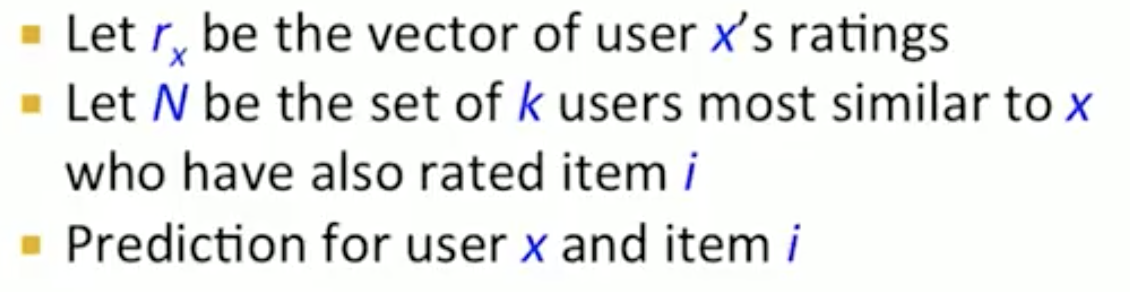

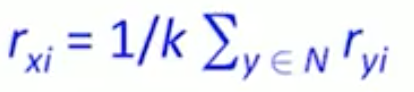
For k-NN rating prediction I have used the above formula.

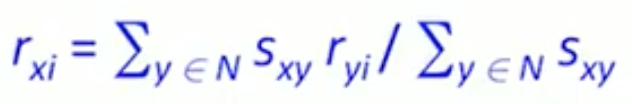
For weighted k-NN rating prediction I have used the above formula where 's' is the similarity value. [1]

In [11]:
#find k nearest neighbors of a specified user
def find_nearest_neighbors(k, userId, movieId, similarity_matrix, pivot):
    neighborhood = []
    users_seen_movie =[]
    users_not_seen_movie = []
    for user in pivot.index:
        if math.isnan(pivot[movieId][user]):
            users_not_seen_movie.append(user)
        else:
            users_seen_movie.append(user)
    
    temp = similarity_matrix.sort_values(userId, axis=1, ascending=False)
            
    for index in temp.columns.values:
        if index in users_seen_movie:
            neighborhood.append(index)
            
    if (len(neighborhood) <= k):
        while (len(neighborhood) <= k):
            for i in temp.columns.values:
                if i in users_not_seen_movie:
                    neighborhood.append(i) 
                
    return neighborhood[0:k]

In [12]:
#rating prediction functions
def knn_rating_predict(k, userId, movieId, similarity_matrix, pivot, final_pivot):
    total_rating = 0;
    rating_avg=0;
    
    neighborhood = find_nearest_neighbors(k, userId, movieId, similarity_matrix, pivot)
    
    for neighbor in neighborhood:
            total_rating += final_pivot[movieId][neighbor]
            
    rating_avg = total_rating/len(neighborhood)
    
    return rating_avg

In [13]:
def weighted_knn_rating_predict(k, userId, movieId, similarity_matrix, pivot, final_pivot):
    w_rating = 0
    rating_avg = 0
    sim_sum = 0
    
    neighborhood = find_nearest_neighbors(k, userId, movieId, similarity_matrix, pivot)
    for neighbor in neighborhood:
        sim_value = similarity_matrix[neighbor][userId]
        w_rating += (sim_value * final_pivot[movieId][neighbor])
        sim_sum += sim_value
        
    rating_avg = (w_rating / sim_sum)

    return rating_avg

Below, there are functions to calculate Mean Absolute Error.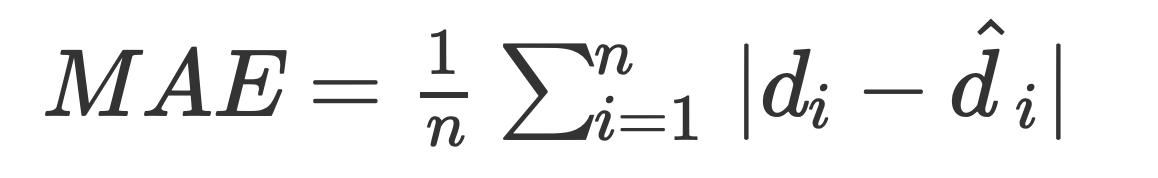

In [14]:
#error calculations
def calculate_error(real_rating, predicted_rating):
    return abs(real_rating - predicted_rating)

def calculate_MAE(error_list):
    return (sum(error_list) / len(error_list))

### Training and Testing Model

Train function takes final_pivot table as a parameter returns the user-user similarity matrix.

In [15]:
def train_model(final_pivot):
    user_vectors = create_vectors(final_pivot)
    similarity_matrix = apply_similarity(user_vectors, final_pivot)
    return similarity_matrix

In the test_model function, I have taken some precautions for some problems may occur. The first problem is if the train set does not contain the movie in the test set. For that I have taken the given user's rating average as a prediction. The second, if train set does not contain the user in the test set. For that as a prediction, I have taken movie rating average. The third is both of the values are missing in the training set and for that I have passed that user.

In [16]:
def test_model(k, similarity_matrix, final_pivot, pivot, error_list, w_error_list):
    
    is_Contain_User = False
    is_Contain_Movie = False
    
    for index in rating_test.index:
        userId = rating_test.loc[index, 'userId']
        movieId = rating_test.loc[index, 'movieId']
        
        if userId in pivot.index:
            is_Contain_User = True
        if movieId in pivot.columns:
            is_Contain_Movie  = True
            
        if is_Contain_User == True and is_Contain_Movie == True:
            pred_1 = knn_rating_predict(k, userId, movieId, similarity_matrix, pivot, final_pivot)
            pred_2 = weighted_knn_rating_predict(k, userId, movieId, similarity_matrix, pivot, final_pivot)
         
        elif is_Contain_User == True and is_Contain_Movie == False:
            pred_1 = pivot.loc[userId, :].mean()
            pred_2 = pivot.loc[userId, :].mean()
            
        elif is_Contain_User == False and is_Contain_Movie == True:
            pred_1 = pivot.loc[:, movieId].mean()
            pred_2 = pivot.loc[:, movieId].mean()
        
        else:
            pred_1 = False
            pred_2 = False
            print("Train set does not contain userID: ", userId, " and movieId: ", movieId, " for k-NN.")
            print("Train set does not contain userID: ", userId, " and movieId: ", movieId, " for Weighted k-NN.")
            
        real_rating = rating_test.loc[index, 'rating_avg']
        
        error = calculate_error(real_rating, pred_1)
        error_list.append(abs(error))
        
        w_error = calculate_error(real_rating, pred_2)
        w_error_list.append(abs(w_error))
        
        is_Contain_User = False
        is_Contain_Movie = False
                    
    return

### Execution of the Program


In [17]:
#training of the model and creation of the similarity matrix between users
similarity_matrix = train_model(final_pivot)
similarity_matrix.head()

userId,1,2,3,5,6,8,9,11,12,13,...,597,598,599,601,603,605,606,607,608,610
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0.928085,0.881608,0.921072,0.829881,0.922833,0.92339,0.908651,0.929202,0.930552,...,0.815448,0.91374,0.668423,0.922697,0.687499,0.871187,0.809935,0.856182,0.695668,0.799364
2,0.928085,0,0.933674,0.974136,0.876792,0.966867,0.975444,0.96914,0.979544,0.980329,...,0.856719,0.959994,0.7114,0.973997,0.739171,0.926135,0.858247,0.899179,0.724849,0.853181
3,0.881608,0.933674,0,0.925265,0.836527,0.919781,0.929386,0.922383,0.933305,0.934407,...,0.809935,0.914983,0.676127,0.926952,0.709952,0.881958,0.808269,0.858528,0.688332,0.814171
5,0.921072,0.974136,0.925265,0,0.868733,0.952764,0.966629,0.957262,0.9728,0.972422,...,0.850422,0.951674,0.708763,0.965392,0.733442,0.913994,0.848347,0.89227,0.714817,0.841051
6,0.829881,0.876792,0.836527,0.868733,0,0.854525,0.874905,0.873679,0.880677,0.879281,...,0.746917,0.861023,0.62515,0.872854,0.652756,0.834825,0.761518,0.814183,0.628871,0.763263


In [18]:
start = time.time()

#two lists for error values
all_error = []
w_all_error = []
errors = []
weighted_errors = []

k=5

while (k != 65):
    
    test_model(k, similarity_matrix, final_pivot, pivot, errors, weighted_errors)
    all_error.append(calculate_MAE(errors))
    w_all_error.append(calculate_MAE(weighted_errors))

    k = k + 15
    
end = time.time()
print (end - start, " seconds.")


#print(calculate_MAE(errors))
#print(calculate_MAE(weighted_errors))

 

698.3069543838501  seconds.


In [19]:
print(all_error)
print(w_all_error)

[0.7352450824758353, 0.7219091874420986, 0.7159813731242644, 0.712558922094323]
[0.7352487359081851, 0.721994900842194, 0.716088851478067, 0.7126753731117677]


### Choosing Appropriate 'k' value
As seen above, there is not much difference between my k-nn and weighted k-nn errors but it increases while k increases. Also while k is increasing the MAE value decreases.  I think choosing k between 20 and 35 is appropriate. The graphics are below.

Text(0, 0.5, 'Mean Absolute Error')

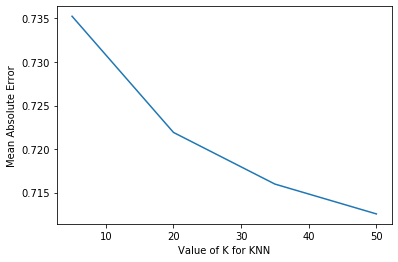

In [22]:
k_range = [5, 20, 35, 50]

plt.plot(k_range, all_error)
plt.xlabel('Value of K for KNN')
plt.ylabel('Mean Absolute Error')

Text(0, 0.5, 'Mean Absolute Error')

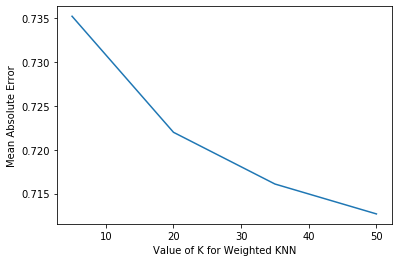

In [21]:
plt.plot(k_range, w_all_error)
plt.xlabel('Value of K for Weighted KNN')
plt.ylabel('Mean Absolute Error')

I think for my code, 30 for the k value is appropriate. Below, I have tried 30 as k.

In [23]:
errors = []
weighted_errors = []

test_model(30, similarity_matrix, final_pivot, pivot, errors, weighted_errors)
print(calculate_MAE(errors))
print(calculate_MAE(weighted_errors))


0.7056474056319337
0.7057724618408973


## References
[1] Pictures in the k-nn and weighted k-nn part is from : https://www.youtube.com/watch?v=h9gpufJFF-0&t=741s
